In [1]:
#Did Tesla's stock price exhibit significant fluctuations immediately after reports of fatal accidents? 
#This includes looking at the stock price on the day of the accident and a few days following it.
# Is there a long-term trend in Tesla’s stock price that correlates with the frequency or severity of accidents over a certain period?
# How does market sentiment, as reflected in Tesla's stock price, respond to high-profile accidents?
# This can be measured by looking at price volatility and trading volumes.
# Does the involvement of specific Tesla models in fatal accidents have different impacts on the stock price?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
from datetime import datetime
import plotly.express as px
from plotly.offline import iplot, plot

In [3]:
# Load the provided datasets
raw_path = '/Users/cicizeng/Desktop/STA386/Semester Project/'
deaths_df = pd.read_csv(raw_path + "Tesla Deaths - Deaths (3).csv")
miles_df = pd.read_csv(raw_path + "Tesla Deaths - Miles.csv")
sudden_acceleration_df = pd.read_csv(raw_path + "Tesla Deaths - Sudden Acceleration.csv")
tsla_df = pd.read_csv(raw_path + "TSLA.csv",parse_dates=True, index_col='Date')

In [4]:
url = "https://www.alphavantage.co/query"
parameters = {
    "function": "TIME_SERIES_DAILY",
    "symbol": "TSLA",
    "apikey": " S2F6B0CDOL4E5C62"
}

response = requests.get(url, params=parameters)
data = response.json()

# Convert the nested dictionary to a DataFrame
stock_df = pd.DataFrame.from_dict(data['Time Series (Daily)'], orient='index')
stock_df.index = pd.to_datetime(stock_df.index)
stock_df['4. close'] = stock_df['4. close'].astype(float)

# Save to CSV
stock_df.to_csv('tesla_stock_data.csv')

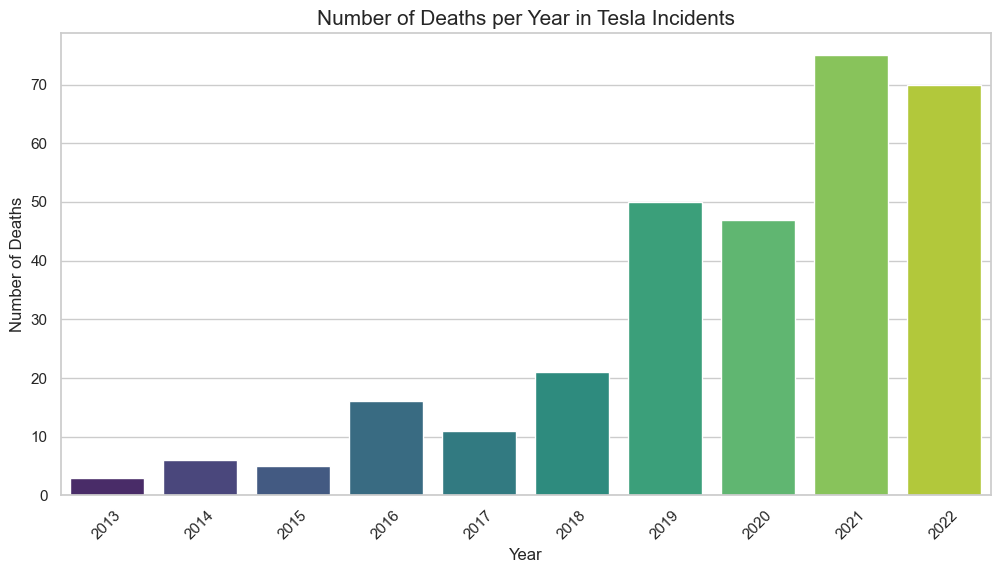

In [5]:
# Yearly analysis: Summing up the deaths per year
yearly_deaths = deaths_df.groupby('Year')[' Deaths '].sum().sort_values()

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Yearly deaths visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_deaths.index, y=yearly_deaths.values, palette="viridis")
plt.title('Number of Deaths per Year in Tesla Incidents', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.xticks(rotation=45)
plt.show()


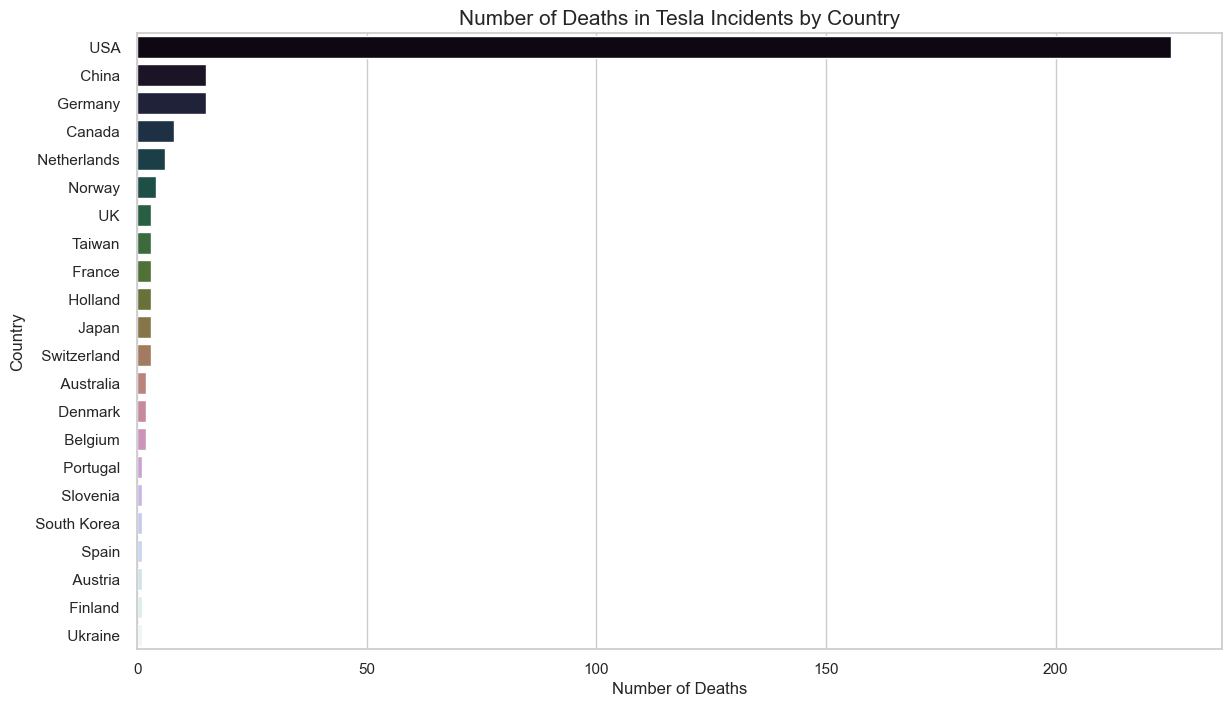

In [7]:
# Geographical analysis by country
country_deaths = deaths_df.groupby(' Country ')[' Deaths '].sum().sort_values(ascending=False)

# Geographical analysis by country visualization
plt.figure(figsize=(14, 8))
sns.barplot(x=country_deaths.values, y=country_deaths.index, palette="cubehelix")
plt.title('Number of Deaths in Tesla Incidents by Country', fontsize=15)
plt.xlabel('Number of Deaths', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

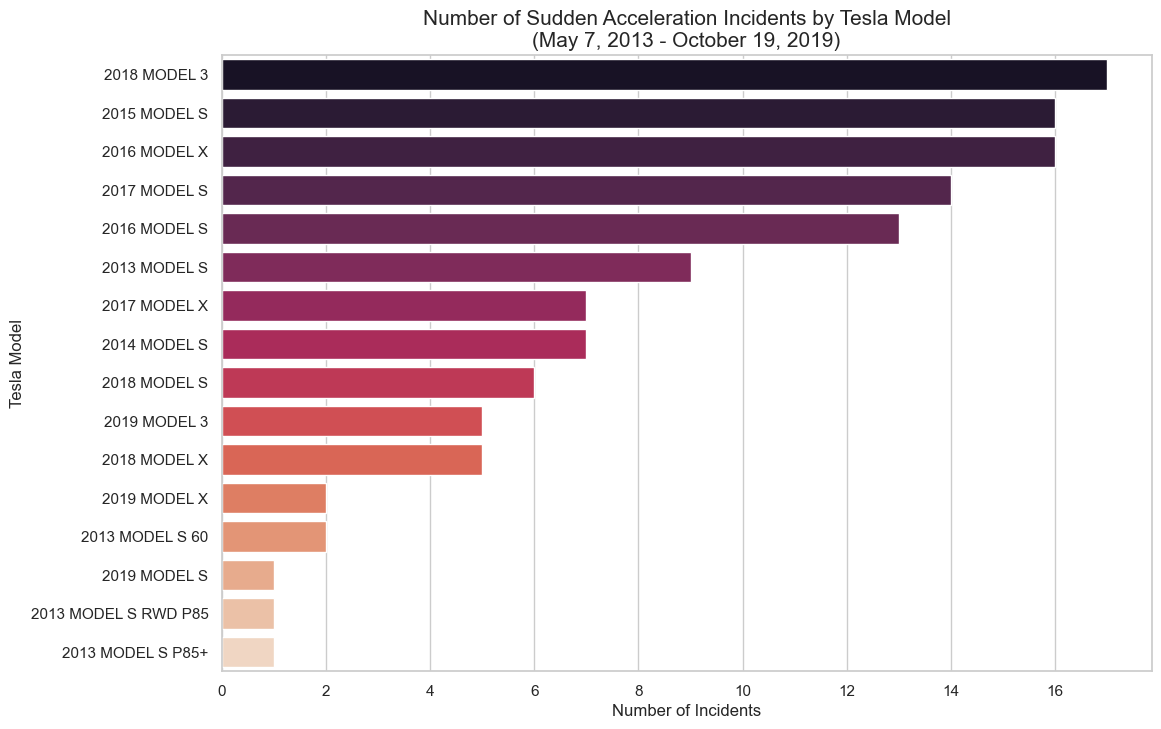

In [8]:
# Model analysis on the sudden acceleration dataset
model_incident_count = sudden_acceleration_df['Model'].value_counts()

model_incident_count

# Convert 'Incident Date' to datetime format and find the earliest and latest dates
sudden_acceleration_df['Incident Date'] = pd.to_datetime(sudden_acceleration_df['Incident Date'], errors='coerce')
earliest_date = sudden_acceleration_df['Incident Date'].min()
latest_date = sudden_acceleration_df['Incident Date'].max()

earliest_date, latest_date

# Visualization of model incident count with time frame in the title
plt.figure(figsize=(12, 8))
sns.barplot(y=model_incident_count.index, x=model_incident_count.values, palette="rocket")
plt.title('Number of Sudden Acceleration Incidents by Tesla Model\n(May 7, 2013 - October 19, 2019)', fontsize=15)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Tesla Model', fontsize=12)
plt.show()


In [9]:
#stock data analysis

def line_plot(target_col):
    iplot(px.line(target_col))

cols = tsla_df.columns.tolist()

for col in cols:
    line_plot(tsla_df[col])

In [10]:
# plotting the Open & Close columns Together
open_close = tsla_df[['Open', 'Close']]
fig = px.line(open_close, title='Opening & Closing Price of Tesla')
fig.show()

In [11]:
# Plotting the High && Low columns together
high_low = tsla_df[['High', 'Low']]
fig = px.line(high_low, title='High & Low Price of Tesla')
fig.show()

Correlation coefficient: 0.17830354491167097


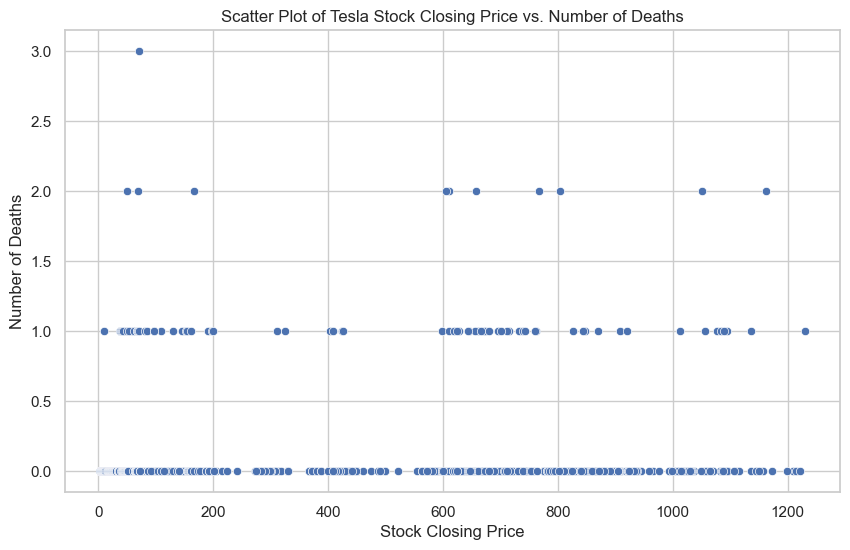

In [12]:
deaths_df['Date'] = pd.to_datetime(deaths_df['Date'], errors='coerce')
deaths_aggregated = deaths_df.groupby('Date').size().reset_index(name='Deaths')

# Merge the stock data with the aggregated deaths data
merged_df = pd.merge(tsla_df, deaths_aggregated, left_index=True, right_on='Date', how='left')
merged_df.fillna(0, inplace=True)  # Assuming no deaths on days without data

# Calculate the correlation
correlation = merged_df['Close'].corr(merged_df['Deaths'])
print("Correlation coefficient:", correlation)

# Visualization with scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Close', y='Deaths')
plt.title("Scatter Plot of Tesla Stock Closing Price vs. Number of Deaths")
plt.xlabel("Stock Closing Price")
plt.ylabel("Number of Deaths")
plt.show()